Import Packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Q 4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [21]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv') #getting data frame from folder

In [25]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


### Q.5.How many rows and columns are in gdp_df? What are the data types of each column?

In [293]:
gdp_df.info() #getting the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
 3   decades         7662 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 239.6+ KB


### Q.6.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [295]:
#gdp_df=gdp_df.drop(columns='Value Footnotes',axis=3)
gdp_df=gdp_df.rename(columns={"Country or Area":"Country","Year":"year","Value":"GDP_Per_Capita"})
print(gdp_df)

          Country  year  GDP_Per_Capita  decades
0     Afghanistan  2021     1517.016266     2020
1     Afghanistan  2020     1968.341002     2020
2     Afghanistan  2019     2079.921861     2010
3     Afghanistan  2018     2060.698973     2010
4     Afghanistan  2017     2096.093111     2010
...           ...   ...             ...      ...
7657     Zimbabwe  1994     2670.106615     1990
7658     Zimbabwe  1993     2458.783255     1990
7659     Zimbabwe  1992     2468.278257     1990
7660     Zimbabwe  1991     2781.787843     1990
7661     Zimbabwe  1990     2704.757299     1990

[7662 rows x 4 columns]


### Q.7.How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [301]:
#how many years do we have in data
gdp_df['year'].nunique()

33

In [307]:
gdp_df['year'].sort_values().unique().tolist()

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [309]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

In [327]:
count_df=gdp_df['Country'].value_counts().reset_index()

In [329]:
count_df

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [315]:
gdp_df


,Country,year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [323]:
count_df.shape

(242, 2)

In [331]:
count_df[count_df['count']==33]['count'].count()


202

In [333]:
count_df[count_df['count']<33]['count'].count()

40

In [121]:
gdp_countries = gdp_df.groupby("year")
gdp_observations = gdp_countries["Country"].count()
print(gdp_observations.to_string()) # Number of countries per year

year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232


In [123]:
missing_countries = gdp_df.groupby('Country')['year'].count().sort_values().reset_index()
missing_countries = missing_countries.rename(columns={'year':'count_of_year'})
missing_countries[missing_countries['count_of_year']<33]['Country'].count()

40

In [287]:
#Ryan's lines of code
# Questions to answer: What is the range of years in the dataset? List countries by count of unique years. List years by count of unique countries.
gdp_years = gdp_df.groupby("Country")
gdp_last = gdp_years.last()
gdp_min = gdp_last.sort_values(by="year",ascending=False)
# All countries' first appearance in the dataset
gdp_min[gdp_min["year"]>1990]
# All countries' whose first appearance was after 1990

,year,GDP_Per_Capita,decades
Country,,,
Somalia,2013,889.166677,2010
Djibouti,2013,3664.268036,2010
Turks and Caicos Islands,2011,25731.283253,2010
Sint Maarten (Dutch part),2009,41969.404381,2000
Kosovo,2008,7032.452297,2000
Cayman Islands,2006,84778.384261,2000
Nauru,2004,5342.330551,2000
Afghanistan,2002,1280.463171,2000
SÃ£o TomÃ© and Principe,2001,2558.983512,2000


### Q.8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

## Representations using Seaborn 

Text(0.5, 1.0, 'Histogram for GDP per Capita')

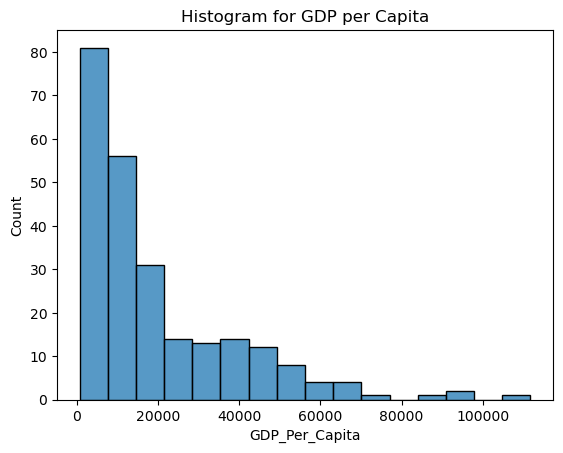

In [337]:
#histogram
year_2020=gdp_df[gdp_df['year']==2020]
sns.histplot( data=year_2020["GDP_Per_Capita"])#, kde=True )
plt.title("Histogram for GDP per Capita")

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

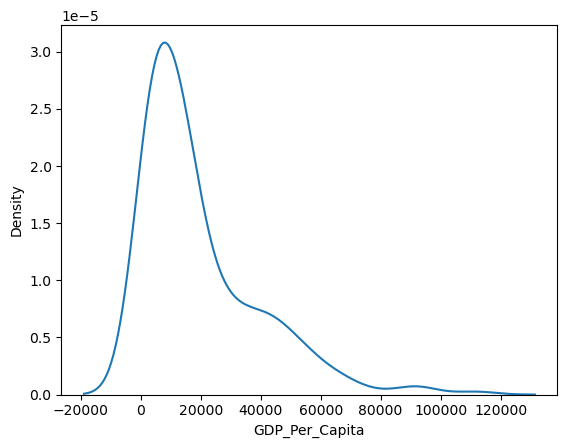

In [146]:
#Density
year_2020=gdp_df[gdp_df['year']==2020]
sns.kdeplot(year_2020['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

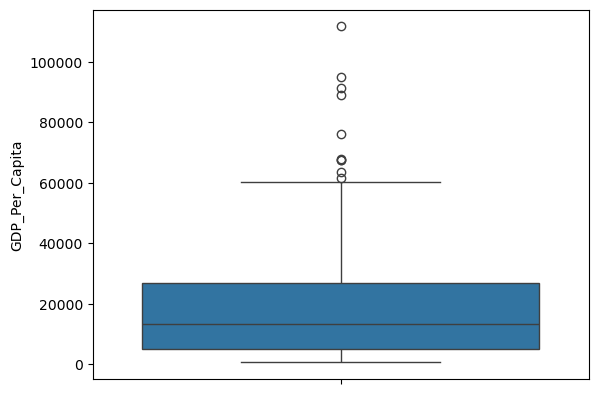

In [158]:
#boxplot
year_2020=gdp_df[gdp_df['year']==2020]
sns.boxplot( y=year_2020["GDP_Per_Capita"] )

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

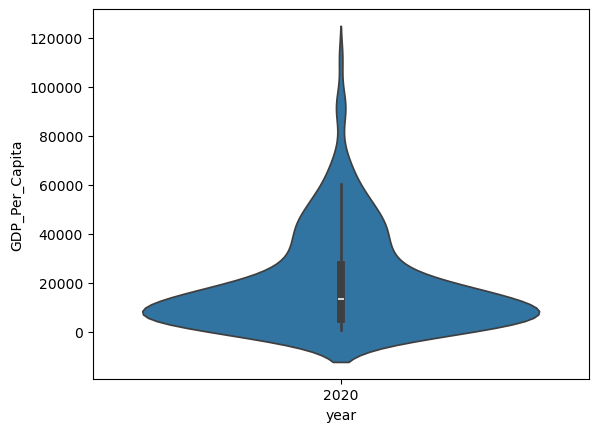

In [138]:
#violin plot of GDP per Capita for the year 2020
year_2020=gdp_df[gdp_df['year']==2020]
sns.violinplot(x=year_2020["year"], y=year_2020["GDP_Per_Capita"])

### Q.9.What was the median GDP per capita value in 2020?

In [170]:
year_2020=gdp_df[gdp_df['year']==2020]
median_2020 = year_2020['GDP_Per_Capita'].median()
print(f"The median for 2020 is: {median_2020}")

The median for 2020 is: 13357.997573370474


### Q.10 For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
A scatterplot
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [339]:
# gdp_df['decades']=(gdp_df['year']//10)*10  #creating new column in data frame
# gdp_decades = gdp_df.groupby('decades')['GDP_Per_Capita'].sum().reset_index()
# sns.barplot(x="decades", y="GDP_Per_Capita", data=gdp_decades)
# plt.show()


In [297]:
gdp_df=gdp_df.drop(columns='decades',axis=3)

In [299]:
gdp_df


,Country,year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [341]:
# sns.scatterplot(x=gdp_decades["decades"], y=gdp_decades["GDP_Per_Capita"],  data=gdp_decades)
# plt.title("GDP Per Capita by Decade")

### Q.10

<Axes: xlabel='year', ylabel='GDP_Per_Capita'>

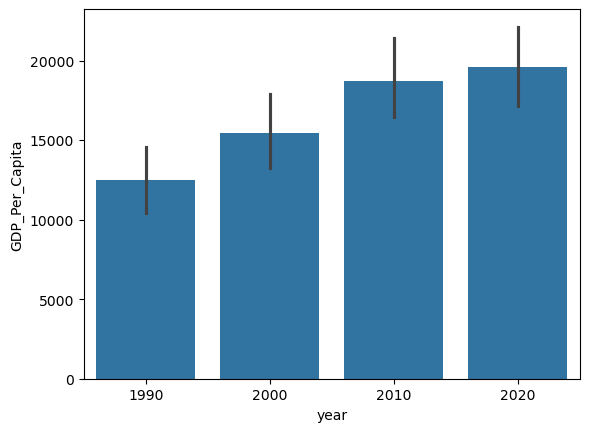

In [257]:
decades = (1990,2000,2010,2020)
gdp_decades2 = gdp_df[gdp_df['year'].isin(decades)]
sns.barplot(x="year", y="GDP_Per_Capita", data=gdp_decades2)

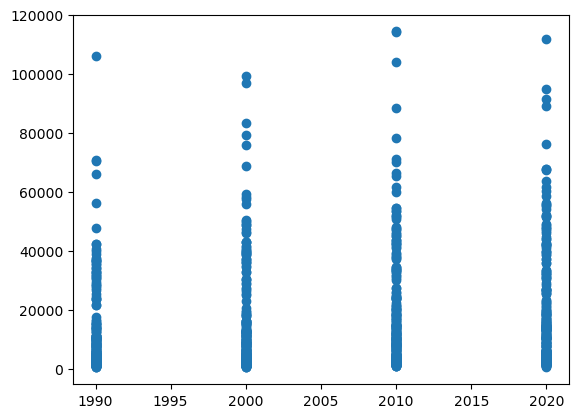

In [232]:
decades = (1990,2000,2010,2020)
gdp_decades2 = gdp_df[gdp_df['year'].isin(decades)]
plt.scatter(gdp_decades2.decades,gdp_decades2.GDP_Per_Capita)

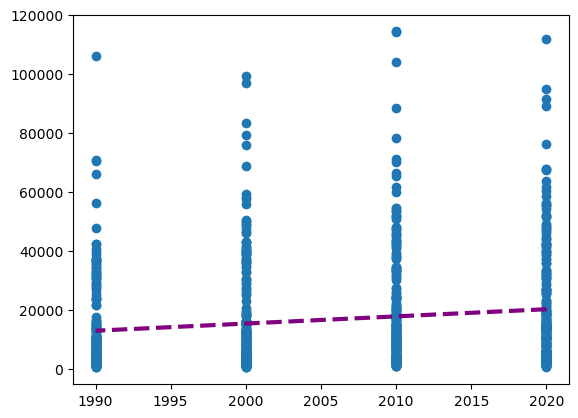

In [251]:
#sns.regplot(x='year', y='GDP_Per_Capita', data=gdp_df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.scatter(gdp_decades2.decades,gdp_decades2.GDP_Per_Capita)
z=np.polyfit(gdp_decades2.decades,gdp_decades2.GDP_Per_Capita,1)
p = np.poly1d(z)
#add trendline to plot
plt.plot(gdp_decades2.decades, p(gdp_decades2.decades),color="purple", linewidth=3, linestyle="--")

<Axes: xlabel='decades', ylabel='GDP_Per_Capita'>

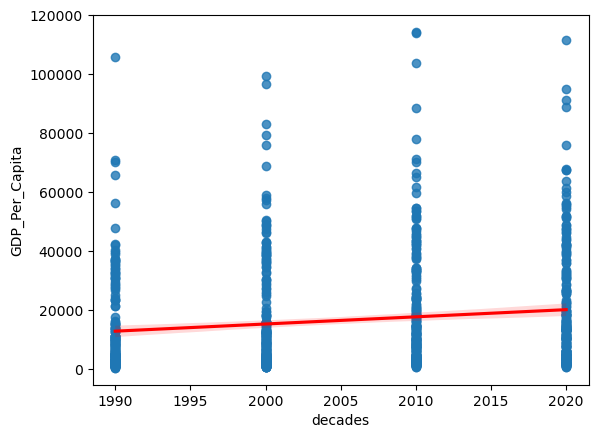

In [263]:
sns.regplot(x='decades', y='GDP_Per_Capita', data=gdp_decades2,  line_kws={'color': 'red'})


### Q.11.Which country was the first to have a GDP per capita greater than $100,000?

In [352]:
gdp_df[gdp_df['GDP_Per_Capita']>100000].sort_values('year')

,Country,year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


### Q.12.Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [359]:
gdp_df[gdp_df['year']==2020].nlargest(1,'GDP_Per_Capita')['Country']

4148    Luxembourg
Name: Country, dtype: object

In [361]:
top_country=gdp_df[gdp_df['Country']=='Luxembourg']

In [363]:
top_country

,Country,year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


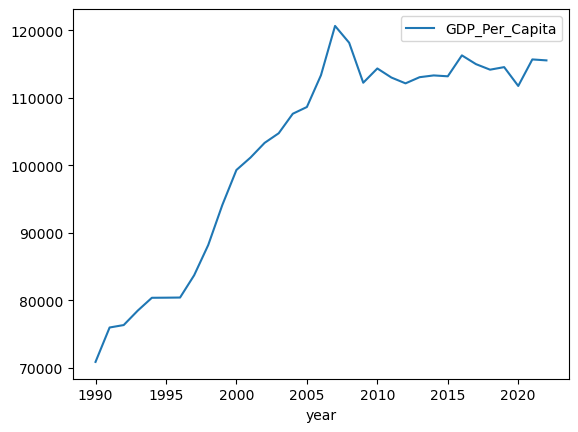

In [369]:
top_country.plot(x='year',y='GDP_Per_Capita',kind='line');

### Q.13.Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [372]:
gdp_df[gdp_df['year']==2020].nsmallest(1,'GDP_Per_Capita')['Country']

973    Burundi
Name: Country, dtype: object

In [374]:
lowest_country=gdp_df[gdp_df['Country']=='Burundi']

In [376]:
lowest_country

,Country,year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


In [19]:
lowest_country.plot(x='year',y='GDP_Per_Capita',kind='line');

NameError: name 'lowest_country' is not defined

### Q.14.Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [17]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=6084)
internet_df

NameError: name 'pd' is not defined

In [21]:
internet-df.info()

NameError: name 'internet' is not defined

### Q.15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [23]:
internet_df=internet_df.drop(columns='Value Footnotes') # drop the column value footnotes
internet_df = internet_df.rename(columns={'Country or area':'Country','Value':'Internet_Users_pct'}) #rename columns
internet_df

NameError: name 'internet_df' is not defined

###16. Look at the number of observations in this dataset per year. What do you notice?


In [26]:
internet_df['Country'].value_counts().head(10)

NameError: name 'internet_df' is not defined

### Q.17. What is the first year to have a non-zero internet users percentage value?

In [33]:
internet_df_with_value = internet_df.sort_values('Internet_Users_pct') #sort values in df based on internet user pct value
internet_df_with_value[internet_df_with_value['Internet_Users_pct']>0].head(1)

NameError: name 'internet_df' is not defined

### Q.18. How does the distribution of internet users percent differ for 2000 and 2014?

In [ ]:
seperate DF for years 2000 and 2014
net_user_2000 = internet_df[(internet_df['Yera']==2000)]
net_user_2014 = internet_df[(internet_df['Yera']==2000)]
def iqr(column):
    return column.quantile(0.75)-column.quantile(0.25)
print(net_user_2000['Internet_Users_pct'].agg([iqr]))
print(net_user_2014['Internet_Users_pct'].agg([iqr]))


### Q.19. For how many countries was the percentage of internet users below 5% in 2014?


In [ ]:
internet_df[(internet_df['Yera']==2014)&(internet_df['Internet_Users_pct']<5)].count()


### Q.20 Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last 

In [ ]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df,on = ['Country','Year'],how = 'outer') #merging gdf_df,internet_df data frames

In [ ]:
gdp_and_internet_use.head(10)

### Q.21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the 

In [ ]:
gdp_and_internet_use[gdp_and_internet_use['Year']==2014].sort_values(by='Internet_Users_pct',ascending = False).head(3)

In [ ]:
top_net_user_2014=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland','Falkland (Malvinas) Islands','Bermuda'])]
# referenced Renuka's line of code
graph= sns.FaceGrid(top_net_user_2014,col='Country')
graph.map(plt.plot,'Year','GDP_Per_Capita')

### Q. 22.Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.


In [44]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014

NameError: name 'gdp_and_internet_use' is not defined